In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [187]:
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [188]:
df.drop(columns=['Unnamed: 0','merge_key','people'], inplace=True)

In [189]:
df.columns

Index(['level_0', 'transaction_date', 'ticker', 'asset_description', 'type',
       'amount', 'representative', 'timestamp', 'state', 'party_x',
       'total_senate_years', 'total_house_years', 'total_years',
       'donation_merge_key', 'name', 'total_raised', 'total_from_small_donors',
       'percent_from_small_donors*', 'total_money_raised', 'party_y', 'start',
       'day_30', 'day_30_stock_perc_diff', 'day_60', 'day_60_stock_perc_diff',
       'day_90', 'day_90_stock_perc_diff', 'day_180',
       'day_180_stock_perc_diff', 'sp_start', 'sp_30', 'sp_30_sp_perc_diff',
       'sp_60', 'sp_60_sp_perc_diff', 'sp_90', 'sp_90_sp_perc_diff', 'sp_180',
       'sp_180_sp_perc_diff'],
      dtype='object')

In [190]:
df['representative'].nunique()

138

In [191]:
df.head(1)

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,...,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,...,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.73999,0.292,3340.969971,0.393


In [192]:
# how many transactions did 
df_transaction_num = df.groupby(['representative'])[['ticker']].count()

In [193]:
df_transaction_num[df_transaction_num['ticker']==1627]

,ticker
representative,
"David A Perdue , Jr",1627


In [194]:
con_stocks_180_days = df.groupby(['representative'])[['day_180_stock_perc_diff']].mean()


In [195]:
# get the avg stock performance by representative after 180 days
con_stocks_180_days = df.groupby(['representative'])[['day_180_stock_perc_diff']].mean()

# get the mean S&P 500 performance after 180 days from when a congressman purchased stock
sp_180_days = df.groupby(['representative'])[['sp_180_sp_perc_diff']].mean()

In [196]:
# look at the top stock returns for congressmen and congresswomen
con_stocks_180_days.sort_values(by='day_180_stock_perc_diff',ascending=False)

,day_180_stock_perc_diff
representative,
Thomas Massie,1.901000
Austin Scott,1.404000
Kim Schrier,1.048250
Bradley S. Schneider,0.984000
Brian Mast,0.928684
...,...
Bill Pascrell,-0.129000
Michael Patrick Guest,-0.227000
"Neal Patrick MD, Facs Dunn",-0.229125


# Top Performer Analysis
Massie sold Tesla stock only, but had a sizable return. His total invesment was less than  50k. Austin Scott bought Bloom Energy and FuelCell Energy, Ballard Power systems, Exxon, GE, Plug Power with lots of small investments. Kim Schrier sold lots of Apple stock in March 2020 worth ~1 million+ dollars. Schneider only sold Trupanion worth approximately 1 $million.

In [197]:
# merge performance of two dataframes
con_sp_180d_avg_merge = con_stocks_180_days.merge(sp_180_days, left_index=True, right_index=True)

In [198]:
# merge transaction numbers with stock performance
stock_perform = con_sp_180d_avg_merge.merge(df_transaction_num, left_index=True, right_index=True)

In [199]:
# create new column for how much their investments made above the s&p500 average
stock_perform['performance_diff_sp500'] = stock_perform['day_180_stock_perc_diff'] - stock_perform['sp_180_sp_perc_diff']

In [200]:
stock_perform.columns

Index(['day_180_stock_perc_diff', 'sp_180_sp_perc_diff', 'ticker',
       'performance_diff_sp500'],
      dtype='object')

In [201]:
stock_perform.columns = ['day_180_stock_perc_diff', 'sp_180_sp_perc_diff', 'stock_transactions',
       'performance_vs_avg_180days']

In [209]:
# clean dataframe for analysis
# drop congressmen with less than 10 transactions.
# our high performer and low performers only 
stock_perform_sorted = stock_perform[stock_perform['stock_transactions']>=5].sort_values(by='performance_vs_avg_180days',ascending=False)

,day_180_stock_perc_diff,sp_180_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Austin Scott,1.404000,0.191000,13,1.213000
Kim Schrier,1.048250,0.159250,8,0.889000
Brian Mast,0.928684,0.112526,19,0.816158
Michael Garcia,0.669136,0.173091,22,0.496045
Frank Pallone,0.653200,0.186000,5,0.467200
...,...,...,...,...
Virginia Foxx,-0.035333,0.159733,30,-0.195067
James E. Banks,-0.079440,0.134600,25,-0.214040
Nicholas Van Taylor,-0.084789,0.142421,19,-0.227211


In [210]:
# save congressmen sorted by best investments over the s&p500 (average) at the same time

stock_perform_sorted = stock_perform[stock_perform['stock_transactions']>=5].sort_values(by='performance_vs_avg_180days',ascending=False)

In [228]:
stock_perform_sorted

,day_180_stock_perc_diff,sp_180_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Austin Scott,1.404000,0.191000,13,1.213000
Kim Schrier,1.048250,0.159250,8,0.889000
Brian Mast,0.928684,0.112526,19,0.816158
Michael Garcia,0.669136,0.173091,22,0.496045
Frank Pallone,0.653200,0.186000,5,0.467200
...,...,...,...,...
Virginia Foxx,-0.035333,0.159733,30,-0.195067
James E. Banks,-0.079440,0.134600,25,-0.214040
Nicholas Van Taylor,-0.084789,0.142421,19,-0.227211


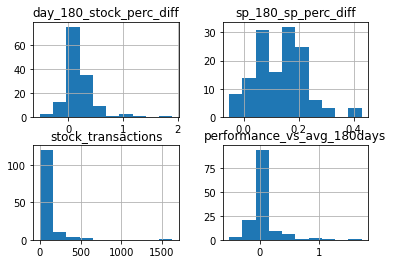

In [223]:
# distirbutions of stock performance
stock_perform.hist();

In [212]:
stock_perform_sorted.index[:5]

Index(['Austin Scott', 'Kim Schrier', 'Brian Mast', 'Michael Garcia',
       'Frank Pallone'],
      dtype='object', name='representative')

In [215]:
df.head(1)

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,...,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,...,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.73999,0.292,3340.969971,0.393


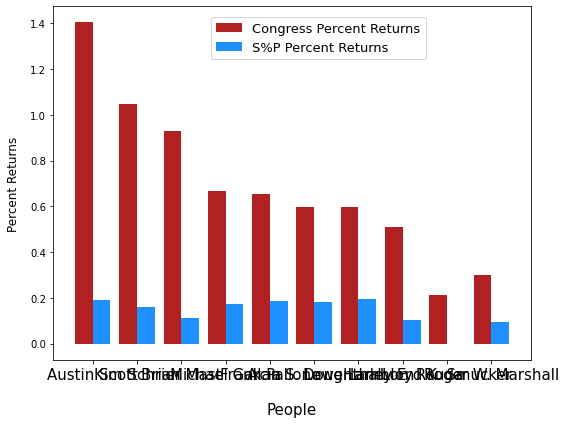

In [229]:
# visualizations



# get grouped returns by person (fill with columns as needed)
values = stock_perform_sorted

#getting names of top 5 reps
barchart_names = values.index[:10]
labels = [col for col in barchart_names]
#getting corresponding names 
lst_one = [item for item in values.day_180_stock_perc_diff[:10].values]
lst_two =  [item for item in values.sp_180_sp_perc_diff[:10].values]
#make labels and bar locations
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars
# plot both columns next to eachother 
fig, ax = plt.subplots(figsize = (8, 6))
rects1 = ax.bar(x - width/2, lst_one, width, label='Congress Percent Returns', color = 'firebrick')
rects2 = ax.bar(x + width/2, lst_two, width, label='S%P Percent Returns ', color = 'dodgerblue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent Returns', fontsize = 12, labelpad = 10)
ax.set_xlabel('People', fontsize = 15, labelpad = 20)
# setting up the graph
#ax.set_ylim([.05,.3])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 15)
ax.legend(loc = (0.33, .85), fontsize = 13, facecolor = 'white')
ax.set_facecolor('white')
fig.tight_layout()
plt.show();